In [19]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Amazon baby review

In [10]:
df = pd.read_csv('data/ratings_Baby.csv', header=None)

In [12]:
df.columns = ['user','item','rating','timestamp']

In [13]:
df.head()

,user,item,rating,timestamp
0,A28O3NP6WR5517,0188399313,5.0,1369612800
1,AX0M1Z6ZWO52J,0188399399,5.0,1365465600
2,A1KD7N84L7NIUT,0188399518,4.0,1392336000
3,A29CUDEIF4X1UO,0188399518,3.0,1373241600
4,A32592TYN6C9EM,0316967297,4.0,1378425600


## Plot 1. Distribution of ratings
The distribution is highly skewed to the higher rating. The reviews with the rating of 5.0 score is 58% of the total number of ratings, which explains why the avrage rating is as high as 4.12.

/Users/chinwen/anaconda/envs/AML/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


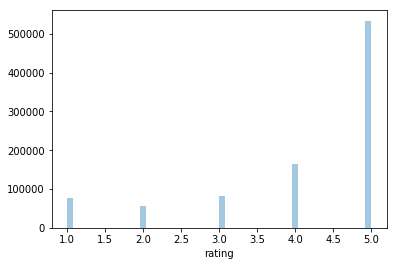

In [28]:
_ = sns.distplot(df.rating, kde=False)

In [38]:
print('Average rating: ', np.average(df.rating))

Average rating:  4.117694544517099


In [39]:
rating5 = df[df.rating == 5.0].shape[0]/df.shape[0]
print('The percentage of rating 5.0: ', rating5)

The percentage of rating 5.0:  0.583466419646817


## Plot 2. Number of review over time
The number of reviews increases gradually from 2000 to 2010. From 2010 to 2012, many more reviews about baby products were published. The sharp increase can be observed since 2012 and exceeded 1.2 million in 2013. The data in 2014 is only until July 23, 2014. 

In [47]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

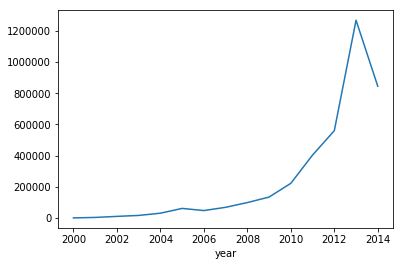

In [55]:
g = df.groupby(['year'])['rating'].sum().plot()

In [59]:
df.datetime.max()

Timestamp('2014-07-23 00:00:00')